<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap05_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

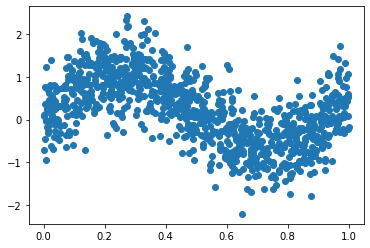

In [28]:
# LAB 6-1
# 1.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')

plt.scatter(df['x'],df['y'])

In [29]:
# 2.
from sklearn.preprocessing import PolynomialFeatures

X = df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1, 1)  # 하나씩 재배열
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [30]:
# 3.
lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1, 1)  # 입력은 2차원 벡터로 변형

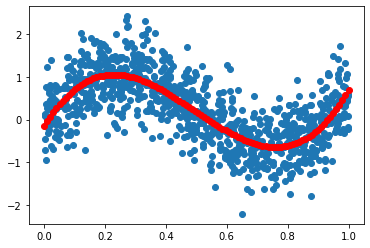

In [31]:
# 4.
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color='r')

In [32]:
# LAB 6-2
# 1.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data[:, :2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
# 2.
from sklearn.tree import export_graphviz

export_graphviz(
    dec_tree,
    out_file=('./dec_tree_for_iris.dot'),
    feature_names=iris.feature_names[:2],
)

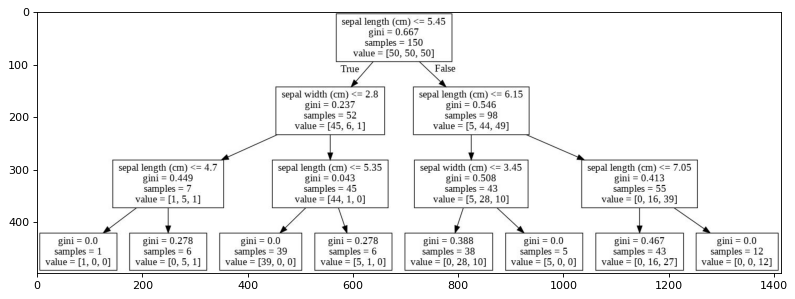

In [34]:
# 3.
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)